# **Hypothesis testing**

## Business goals: promotion response

* Which segments are more likely to respond to promotional events (i.e., use promo codes or discounts)?

* What customer attributes correlate with higher spending during promotions?




# **Statistical tests**

* Loading of the dataset as Pandas DataFrame.

In [45]:
import pandas as pd
import numpy as np

* 'pd.read_csv()'

In [2]:
import pandas as pd
df_cleaned = pd.read_csv('../jupyter_notebooks/final/cleaned_shopping_trends_and_customer_behaviour_dataset.csv') 
df_cleaned

,age,age_group,gender,item_purchased,category,purchase_amount_(usd),location,colour,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,55,Pre-Retirement,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Bi-Weekly
1,19,Gen Z,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Bi-Weekly
2,50,Gen X Late,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Gen X Late,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Gen X Early,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Gen X Late,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Gen X Late,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Gen X Early,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
import scipy.stats as stats

* H1: Younger customer groups use promo codes more often than older groups.

In [ ]:
# Clean and preprocess columns

# .str.strip() removes any leading or trailing spaces (e.g., " Yes " becomes "Yes").
# .str.lower() converts the entire string to lowercase (e.g., "Yes" becomes "yes").

df_cleaned['promo_code_used'] = df_cleaned['promo_code_used'].str.strip().str.lower()

# H1: Age group vs Promo code usage (Chi-squared)
h1_table = pd.crosstab(df_cleaned['age_group'], df_cleaned['promo_code_used'])
h1_chi2, h1_p, _, _ = stats.chi2_contingency(h1_table)

# Display results
print("H1 - Age Group vs Promo Code Usage:")
print("Chi² Stat:", h1_chi2)
print("p-value:", h1_p)
print("Significant:", h1_p < 0.05)
print("\n")

H1 - Age Group vs Promo Code Usage:
Chi² Stat: 1.0887155051993171
p-value: 0.9550976431155631
Significant: False




* Interpretation: The p-value is much greater than 0.05, so we fail to reject the null hypothesis. There is no statistically significant difference in promo code usage across age groups.

* H2: Female customers are more likely to use discounts than male customers.

In [ ]:
# Clean and preprocess columns

# .str.strip() removes any leading or trailing spaces (e.g., " Yes " becomes "Yes").
# .str.lower() converts the entire string to lowercase (e.g., "Yes" becomes "yes").

df_cleaned['discount_applied'] = df_cleaned['discount_applied'].str.strip().str.lower()

# H2: Gender vs Discount usage (Chi-squared)
h2_table = pd.crosstab(df_cleaned['gender'], df_cleaned['discount_applied'])
h2_chi2, h2_p, _, _ = stats.chi2_contingency(h2_table)

# Display results
print("H2 - Gender vs Discount Usage:")
print("Chi² Stat:", h2_chi2)
print("p-value:", h2_p)
print("Significant:", h2_p < 0.05)
print("\n")

H2 - Gender vs Discount Usage:
Chi² Stat: 1381.9413463923058
p-value: 1.7645380691667684e-302
Significant: True




* Interpretation: The p-value is far below 0.05 [1.76e−302 = in plain terms to 0.000...(301 zeros)...176] so we reject the null hypothesis. There is a strong correlation between gender and discount usage. Female customers are significantly more likely to use discounts than male customers.

* H3: Customers who use discounts tend to spend more per purchase.

In [ ]:
# Clean and preprocess columns

# .str.strip() removes any leading or trailing spaces (e.g., " Yes " becomes "Yes").
# .str.capitalize() ensures the first letter is uppercase and the rest are lowercase (e.g., "male" becomes "Male").

df_cleaned['gender'] = df_cleaned['gender'].str.strip().str.capitalize()

# H3: Spend difference by discount usage (t-test)
group1 = df_cleaned[df_cleaned['discount_applied'] == 'yes']['purchase_amount_(usd)']
group2 = df_cleaned[df_cleaned['discount_applied'] == 'no']['purchase_amount_(usd)']
h3_t, h3_p = stats.ttest_ind(group1, group2, equal_var=False)

# Display results
print("H3 - Discount vs Spend:")
print("Chi² Stat:", h3_p)
print("p-value:", h3_t)
print("Significant:", h3_p < 0.05)
print("\n")

H3 - Discount vs Spend:
Chi² Stat: 0.26611244488939256
p-value: -1.1122316185807992
Significant: False




* Interpretation: The p-value is greater than 0.05, so we fail to reject the null hypothesis. There is no significant difference in spending between customers who use discounts and those who do not.

* H4: Season affects promotion response (e.g., more promo code use during Winter sales)

In [ ]:
# Clean and preprocess columns

# .str.strip() removes any leading or trailing spaces (e.g., " Yes " becomes "Yes").

df_cleaned['age_group'] = df_cleaned['age_group'].str.strip()

# H4: Season vs Promo code usage (Chi-squared)
h4_table = pd.crosstab(df_cleaned['season'], df_cleaned['promo_code_used'])
h4_chi2, h4_p, _, _ = stats.chi2_contingency(h4_table)

# Display results
print("H4 - Season vs Promo Code Usage:")
print("Chi² Stat:", h4_chi2)
print("p-value:", h4_p)
print("Significant:", h4_p < 0.05)
print("\n")

H4 - Season vs Promo Code Usage:
Chi² Stat: 3.1687022338896487
p-value: 0.3663388240993125
Significant: False




* Interpretation: The p-value is greater than 0.05, so we fail to reject the null hypothesis. There is no statistically significant correlation between season and promotional code usage.

# **Visualisation for each hypothesis**

* Import of libraries

In [46]:
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns
sns.set(style="whitegrid")

In [48]:
import plotly.express as px

1. **H1: Promo code usage by age group**

In [50]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
# Create a crosstab of promo code usage by age group
age_promo_counts = pd.crosstab(df_cleaned['age_group'], df_cleaned['promo_code_used'])

# Plot using matplotlib
plt.figure(figsize=(10, 6))
age_promo_counts.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'])

plt.title("Promo code usage by age group")
plt.xlabel("Age group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Promo code used")
plt.tight_layout()
plt.show()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

<Figure size 1000x600 with 0 Axes>

* Promo code usage by age group (H1) shows if younger groups (e.g., Gen Z, Millennials) use more promo codes than other groups. 

2. **H2: Discount usage by gender**

In [20]:
%pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


* When running the code initially, faced an error. To resolve error: 'ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed', needed to run '%pip install nbformat>=4.2.0' as a code first. Plotly graph now displaying correctly. Breakfix advised by a fellow student (Jane Weightman).

In [35]:
h2_plot_data = df_cleaned.groupby(['gender', 'discount_applied']).size().reset_index(name='count')

# Create Plotly bar chart
fig = px.bar(
    h2_plot_data,
    x="gender",
    y="count",
    color="discount_applied",
    barmode="group",
    title="Discount usage by gender (interactive)",
    labels={"discount_applied": "Discount Applied", "count": "Number of Customers"}
)

# Show the figure
fig.show()

* Discount usage by gender (H2) highlights gender differences in using discounts.

3. **H3: Purchase amount by discount usage**

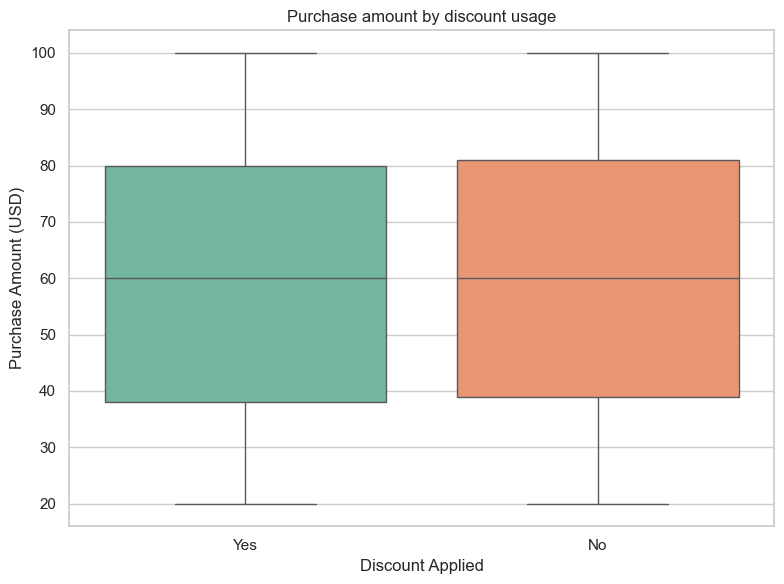

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='discount_applied', y='purchase_amount_(usd)', hue='discount_applied', palette='Set2', legend=False)
plt.title("Purchase amount by discount usage")
plt.xlabel("Discount Applied")
plt.ylabel("Purchase Amount (USD)")
plt.tight_layout()
plt.show()

* Purchase amount by discount usage (H3) uses a boxplot to compare spending behaviour with and without discounts.



4. **H4: Promo Code Usage by Season**

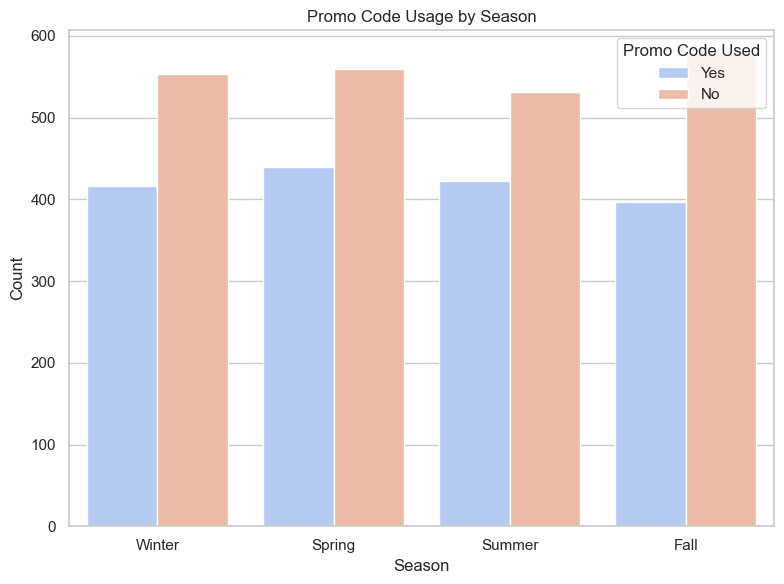

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='season', hue='promo_code_used', palette='coolwarm')
plt.title("Promo Code Usage by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(title="Promo Code Used")
plt.tight_layout()
plt.show()

* Promo code usage by season (H4) helps identify seasonal patterns in promo code usage.